In [1]:
library("tidyverse")

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [2]:
library("ggplot2")
#install.packages("DT")
library("DT")

Warning message:
"package 'DT' was built under R version 3.6.3"

In [3]:
cases <- read_csv("COVID-19_cases_plus_census.csv")

Parsed with column specification:
cols(
  .default = col_double(),
  county_fips_code = col_character(),
  county_name = col_character(),
  state = col_character(),
  state_fips_code = col_character(),
  date = col_date(format = ""),
  geo_id = col_character(),
  pop_5_years_over = col_logical(),
  speak_only_english_at_home = col_logical(),
  speak_spanish_at_home = col_logical(),
  speak_spanish_at_home_low_english = col_logical(),
  pop_15_and_over = col_logical(),
  pop_never_married = col_logical(),
  pop_now_married = col_logical(),
  pop_separated = col_logical(),
  pop_widowed = col_logical(),
  pop_divorced = col_logical()
)
See spec(...) for full column specifications.


In [4]:
cases

county_fips_code,county_name,state,state_fips_code,date,confirmed_cases,deaths,geo_id,nonfamily_households,family_households,...,speak_only_english_at_home,speak_spanish_at_home,speak_spanish_at_home_low_english,pop_15_and_over,pop_never_married,pop_now_married,pop_separated,pop_widowed,pop_divorced,do_date
50009,Essex County,VT,50,2021-01-19,111,0,50009,994,1726,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,20132017
50007,Chittenden County,VT,50,2021-01-19,3636,78,50007,27549,37357,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,20132017
10001,Kent County,DE,10,2021-01-19,11548,187,10001,19148,44233,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,20132017
44009,Washington County,RI,44,2021-01-19,5521,122,44009,16912,32696,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,20132017
33001,Belknap County,NH,33,2021-01-19,2496,79,33001,8260,16319,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,20132017
44005,Newport County,RI,44,2021-01-19,3578,6,44005,13438,21983,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,20132017
50015,Lamoille County,VT,50,2021-01-19,312,1,50015,4086,6315,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,20132017
09013,Tolland County,CT,09,2021-01-19,6255,125,09013,19146,35732,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,20132017
50001,Addison County,VT,50,2021-01-19,527,5,50001,5283,9418,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,20132017
50005,Caledonia County,VT,50,2021-01-19,307,4,50005,4763,7331,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,20132017


In [5]:
cases <- cases %>% mutate_if(is.character, factor)
dim(cases)

[1] 3142  259

In [6]:
cases_CA <- cases %>% filter(state == "CA")
dim(cases_CA)

[1]  58 259

In [7]:
summary(cases_CA)

 county_fips_code           county_name     state    state_fips_code
 06001  : 1       Alameda County  : 1   CA     :58   06     :58     
 06003  : 1       Alpine County   : 1   AK     : 0   01     : 0     
 06005  : 1       Amador County   : 1   AL     : 0   02     : 0     
 06007  : 1       Butte County    : 1   AR     : 0   04     : 0     
 06009  : 1       Calaveras County: 1   AZ     : 0   05     : 0     
 06011  : 1       Colusa County   : 1   CO     : 0   08     : 0     
 (Other):52       (Other)         :52   (Other): 0   (Other): 0     
      date            confirmed_cases       deaths            geo_id  
 Min.   :2021-01-19   Min.   :     40   Min.   :    0.0   06001  : 1  
 1st Qu.:2021-01-19   1st Qu.:   2673   1st Qu.:   27.5   06003  : 1  
 Median :2021-01-19   Median :  11114   Median :  119.0   06005  : 1  
 Mean   :2021-01-19   Mean   :  51668   Mean   :  581.7   06007  : 1  
 3rd Qu.:2021-01-19   3rd Qu.:  39784   3rd Qu.:  440.5   06009  : 1  
 Max.   :2021-01-19   

In [8]:
index = which(cases_CA[,2] == "Los Angeles County")
cases_CA <- cases_CA[-42,]

In [9]:
cases_CA_race <- cases_CA %>% 
  filter(confirmed_cases > 100) %>% 
  arrange(desc(confirmed_cases)) %>%    
  select(county_name, confirmed_cases, deaths, total_pop, white_pop, black_pop,asian_pop,hispanic_pop,amerindian_pop,median_age, male_pop, female_pop)
cases_CA_race <- cases_CA_race %>% mutate(
    cases_per_1000 = confirmed_cases/total_pop*1000, 
    deaths_per_1000 = deaths/total_pop*1000, 
    death_per_case = deaths/confirmed_cases,
    male_per_1000 = male_pop/total_pop*1000,
    female_per_1000 = female_pop/total_pop*1000,
    black_per_1000 = black_pop/total_pop*1000,
    white_per_1000 = white_pop/total_pop*1000,
    asian_per_1000 = asian_pop/total_pop*1000,
    hispanic_per_1000 = hispanic_pop/total_pop*1000,
    amerindian_per_1000 = amerindian_pop/total_pop*1000
)

cases_CA_economic <- cases_CA %>% 
  filter(confirmed_cases > 100) %>% 
  arrange(desc(confirmed_cases)) %>%    
  select(county_name, confirmed_cases, deaths, total_pop, median_income, income_per_capita, median_rent, poverty, commuters_by_public_transportation )
cases_CA_economic <- cases_CA_economic %>% mutate(
    cases_per_1000 = confirmed_cases/total_pop*1000, 
    deaths_per_1000 = deaths/total_pop*1000, 
    death_per_case = deaths/confirmed_cases 
)

cases_CA <- cases_CA %>% 
  filter(confirmed_cases > 100) %>% 
  arrange(desc(confirmed_cases)) %>%    
  select(county_name, confirmed_cases, deaths, total_pop, male_pop, female_pop, white_pop, black_pop,asian_pop,hispanic_pop,amerindian_pop, median_income, median_age, poverty, commuters_by_public_transportation )
cases_CA <- cases_CA %>% mutate(
    cases_per_1000 = confirmed_cases/total_pop*1000, 
    deaths_per_1000 = deaths/total_pop*1000, 
    death_per_case = deaths/confirmed_cases,
    male_per_1000 = male_pop/total_pop*1000,
    female_per_1000 = female_pop/total_pop*1000,
    black_per_1000 = black_pop/total_pop*1000,
    white_per_1000 = white_pop/total_pop*1000,
    asian_per_1000 = asian_pop/total_pop*1000,
    hispanic_per_1000 = hispanic_pop/total_pop*1000,
    amerindian_per_1000 = amerindian_pop/total_pop*1000
)
summary(cases_CA_economic)
summary(cases_CA_race)

              county_name confirmed_cases      deaths         total_pop      
 Alameda County     : 1   Min.   :   260   Min.   :   2.0   Min.   :   9017  
 Amador County      : 1   1st Qu.:  2968   1st Qu.:  29.0   1st Qu.:  56285  
 Butte County       : 1   Median : 11607   Median : 121.0   Median : 185015  
 Calaveras County   : 1   Mean   : 36255   Mean   : 360.1   Mean   : 524964  
 Colusa County      : 1   3rd Qu.: 38373   3rd Qu.: 431.0   3rd Qu.: 629918  
 Contra Costa County: 1   Max.   :252808   Max.   :2517.0   Max.   :3283665  
 (Other)            :49                                                      
 median_income    income_per_capita  median_rent        poverty      
 Min.   : 36563   Min.   :17303     Min.   : 531.0   Min.   :  1378  
 1st Qu.: 47734   1st Qu.:23106     1st Qu.: 752.5   1st Qu.:  7895  
 Median : 56481   Median :28241     Median : 902.0   Median : 31967  
 Mean   : 61310   Mean   :30439     Mean   :1021.9   Mean   : 74260  
 3rd Qu.: 72360   3rd Qu.:

              county_name confirmed_cases      deaths         total_pop      
 Alameda County     : 1   Min.   :   260   Min.   :   2.0   Min.   :   9017  
 Amador County      : 1   1st Qu.:  2968   1st Qu.:  29.0   1st Qu.:  56285  
 Butte County       : 1   Median : 11607   Median : 121.0   Median : 185015  
 Calaveras County   : 1   Mean   : 36255   Mean   : 360.1   Mean   : 524964  
 Colusa County      : 1   3rd Qu.: 38373   3rd Qu.: 431.0   3rd Qu.: 629918  
 Contra Costa County: 1   Max.   :252808   Max.   :2517.0   Max.   :3283665  
 (Other)            :49                                                      
   white_pop         black_pop          asian_pop       hispanic_pop    
 Min.   :   7035   Min.   :    53.0   Min.   :    96   Min.   :    937  
 1st Qu.:  35260   1st Qu.:   614.5   1st Qu.:   824   1st Qu.:  11926  
 Median : 101460   Median :  4109.0   Median :  9998   Median :  51131  
 Mean   : 219951   Mean   : 24761.0   Mean   : 72461   Mean   : 185670  
 3rd Qu.: 2

In [10]:
datatable(cases_CA_race) %>% formatRound(c(5, 9, 10), 2) %>% formatPercentage(11, 2)

HTML widgets cannot be represented in plain text (need html)

In [11]:
datatable(cases_CA_economic) %>% formatRound(c(5, 9, 10), 2) %>% formatPercentage(11, 2)

HTML widgets cannot be represented in plain text (need html)

In [12]:
counties <- map_data("county") %>% as_tibble()
counties_CA <- counties %>% 
  filter(region == "california") %>% 
  rename(county = subregion)


Attaching package: 'maps'

The following object is masked from 'package:purrr':

    map



In [13]:
cases_CA <- cases_CA %>% mutate(county = county_name %>% 
    str_to_lower() %>% str_replace('\\s+county\\s*$', ''))

counties_CA_clust <- counties_CA %>% left_join(cases_CA)

Joining, by = "county"


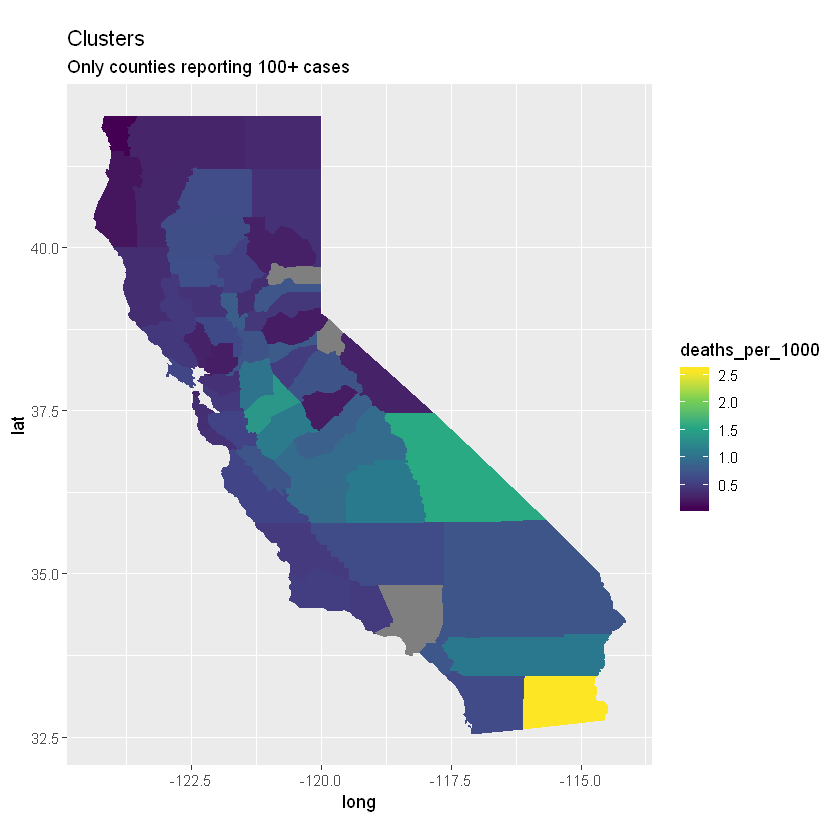

In [14]:

ggplot(counties_CA_clust, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = deaths_per_1000)) +
  coord_quickmap() +
  scale_fill_continuous(type = "viridis") +
  labs(title = "Clusters", subtitle = "Only counties reporting 100+ cases")

In [15]:
cases_CA_race_scaled <- cases_CA_race %>% 
  select(
    median_age,
#     male_per_1000, 
#     female_per_1000, 
    white_per_1000, 
    black_per_1000,
    asian_per_1000,
    hispanic_per_1000,
    amerindian_per_1000,
   # total_pop, # you should use density
    
  ) %>% 
  scale() %>% as_tibble()

cases_CA_economic_scaled <- cases_CA_economic %>% 
  select(
    median_income, 
    income_per_capita, 
    median_rent, 
    poverty, 
    commuters_by_public_transportation 
   # total_pop, # you should use density
    
  ) %>% 
  scale() %>% as_tibble()

Warning message:
"package 'factoextra' was built under R version 3.6.3"Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


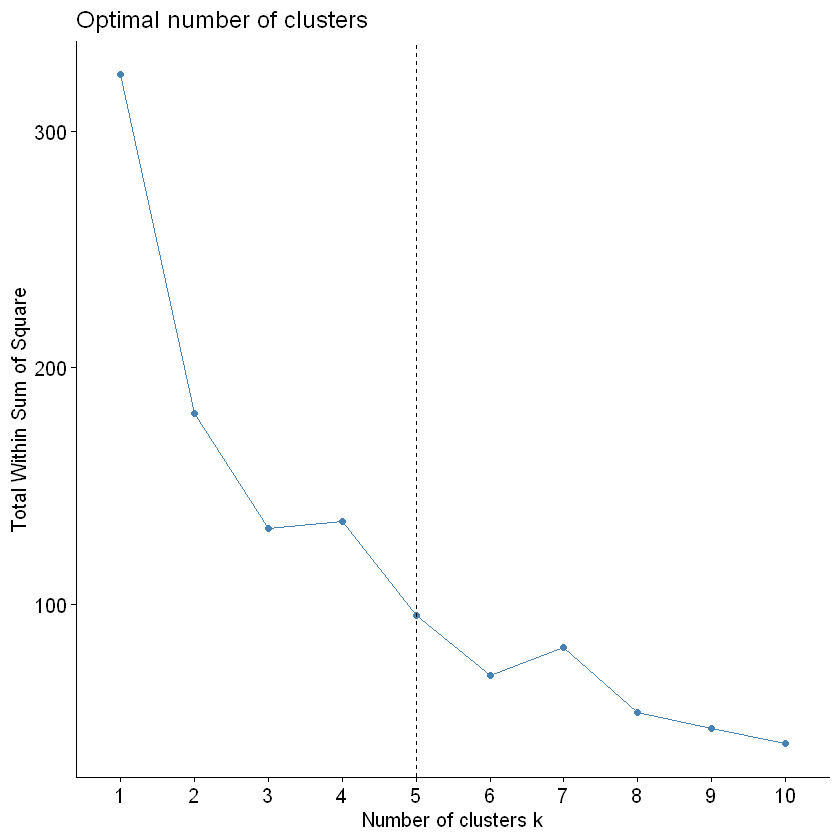

In [16]:
library(factoextra)

# Perform the elbow test
fviz_nbclust(cases_CA_race_scaled, kmeans, method = "wss") + geom_vline(xintercept = 5, linetype = "dashed")

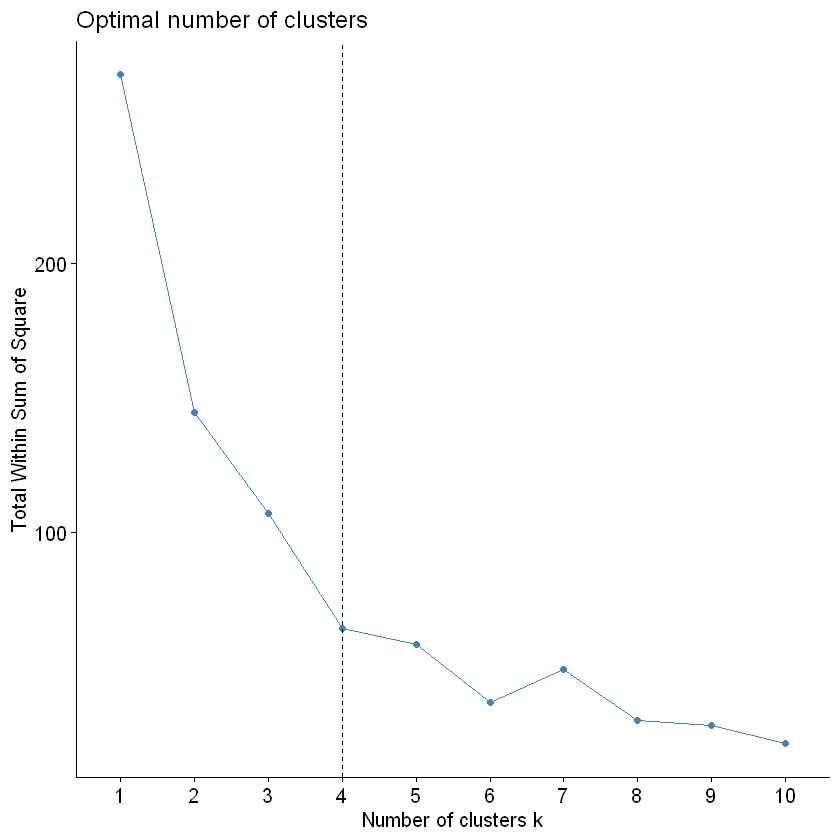

In [17]:
fviz_nbclust(cases_CA_economic_scaled, kmeans, method = "wss") + geom_vline(xintercept = 4, linetype = "dashed")

Warning message:
"package 'ggfortify' was built under R version 3.6.3"

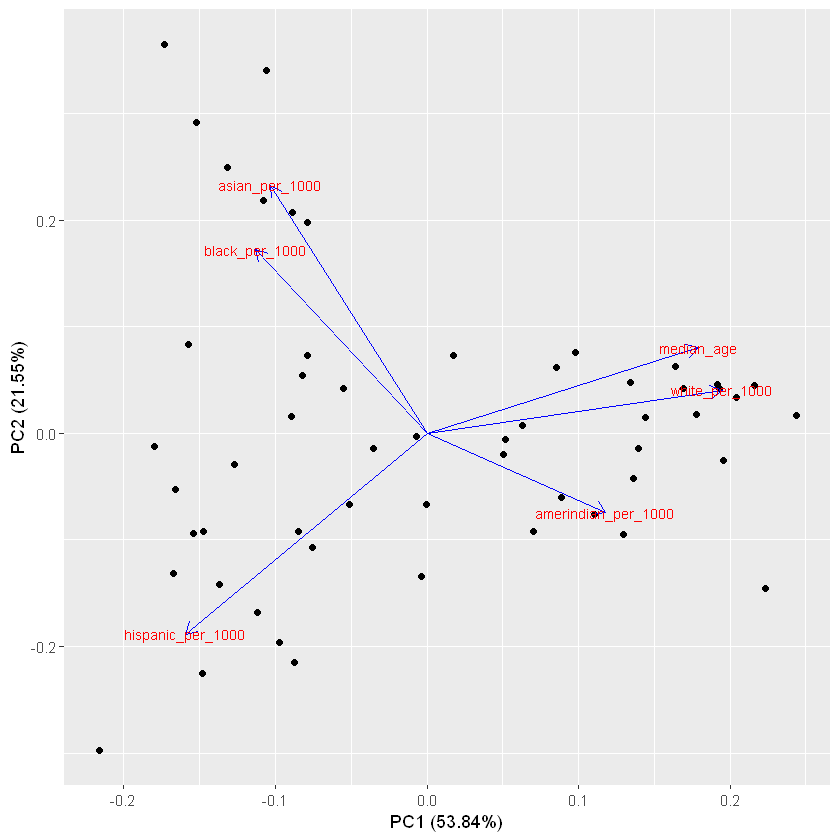

In [18]:
library("ggfortify")
pca_res <- prcomp(cases_CA_race_scaled)
autoplot(pca_res, data = cases_CA_race_scaled,
         loadings = TRUE, loadings.colour = 'blue',
         loadings.label = TRUE, loadings.label.size = 3)

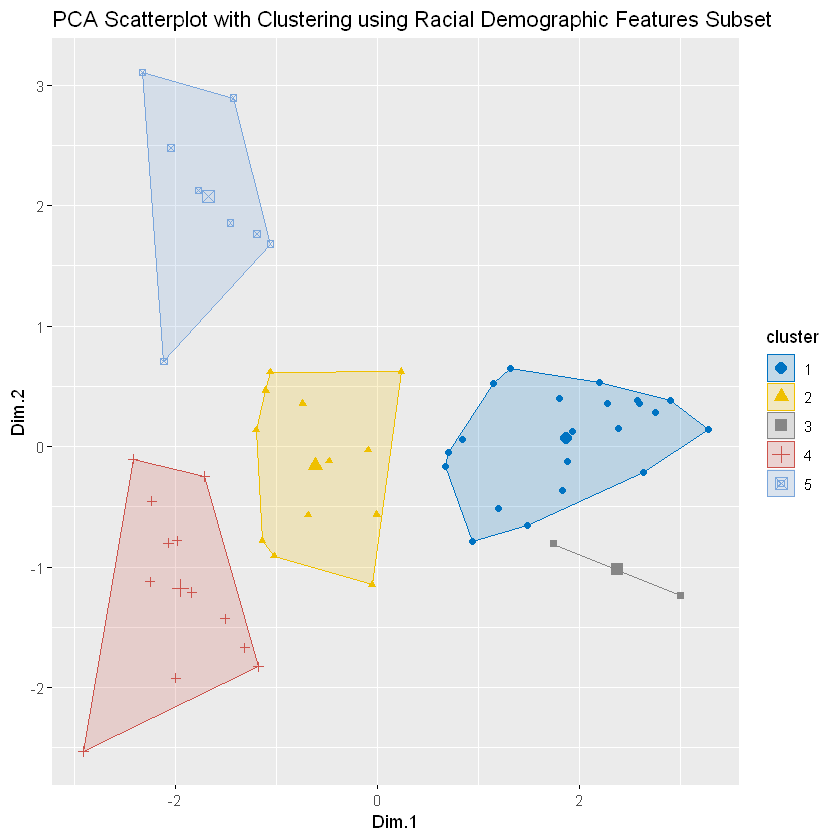

In [54]:
# Load the necessary library for PCA and clustering
library("FactoMineR")
library("factoextra")

# Create a matrix with only the numerical variables
num_data <- cases_CA_race_scaled[, sapply(cases_CA_race_scaled, is.numeric)]

# Perform PCA on the numerical data
pca_race <- PCA(num_data, graph = FALSE)

# Get the coordinates of each observation in the new 2-dimensional space
coords <- as.data.frame(pca_race$ind$coord[, 1:2])

# Perform k-means clustering on the coordinates
k <- 5 # set the number of clusters to 3
set.seed(123) # set the random seed for reproducibility
km_race <- kmeans(cases_CA_race_scaled, k)

# Plot the coordinates on a scatterplot, colored by cluster
fviz_cluster(km_race, geom = "point", data = coords, stand = FALSE,
             ellipse.type = "convex", ellipse.level = 0.95, palette = "jco",
             main = "PCA Scatterplot with Clustering using Racial Demographic Features Subset")

# Add axis labels
# xlabel <- paste("PC1 (", round(pca$eig[1,2]*100,2), "%)", sep = "")
# ylabel <- paste("PC2 (", round(pca$eig[2,2]*100,2), "%)", sep = "")
# xlabel <- sub(" ", "", xlabel) # remove spaces
# ylabel <- sub(" ", "", ylabel) # remove spaces
# xlabel <- sub("\\(|\\)", "", xlabel) # remove parentheses
# ylabel <- sub("\\(|\\)", "", ylabel) # remove parentheses
# xlabel <- sub("%", "%%", xlabel) # escape the percent sign
# ylabel <- sub("%", "%%", ylabel) # escape the percent sign
# xlabel <- expression(paste(xlabel)) # use expression to render the text as mathematical notation
# ylabel <- expression(paste(ylabel)) # use expression to render the text as mathematical notation
# xlabel(xlabel)
# ylabel(ylabel)

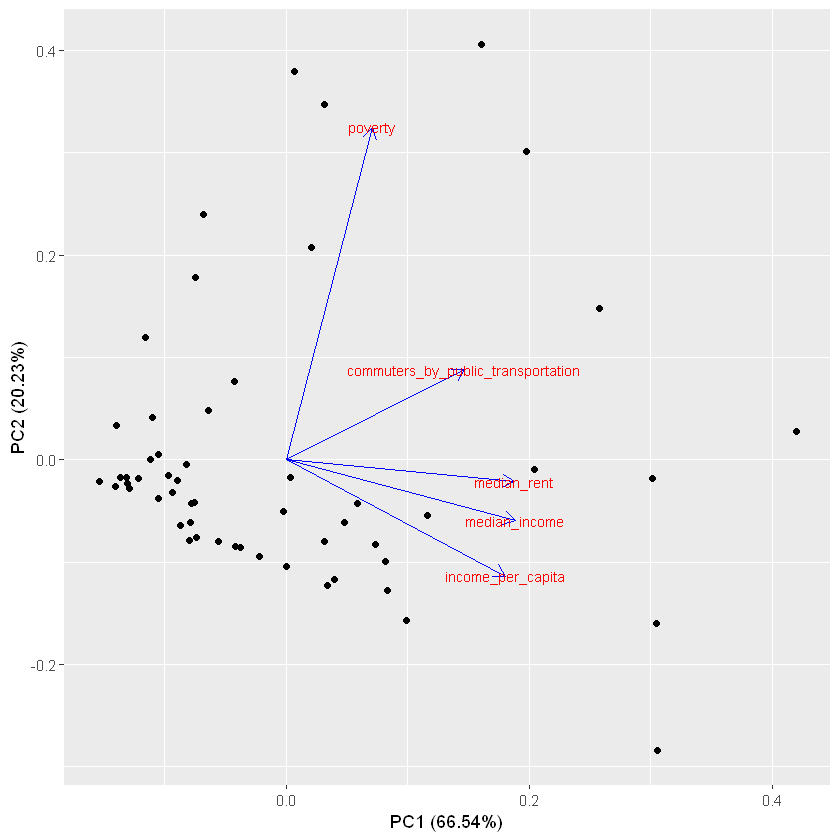

In [29]:
library("ggfortify")
pca_res <- prcomp(cases_CA_economic_scaled)
autoplot(pca_res, data = cases_CA_economic_scaled,
         loadings = TRUE, loadings.colour = 'blue',
         loadings.label = TRUE, loadings.label.size = 3)

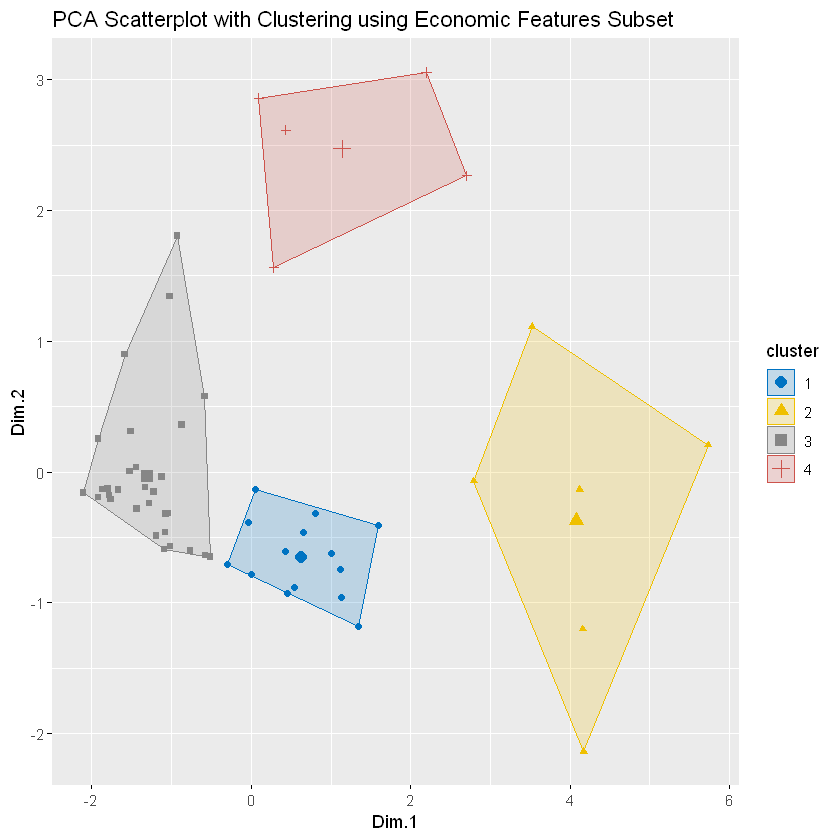

In [60]:
# Load the necessary library for PCA and clustering
library("FactoMineR")
library("factoextra")

# Create a matrix with only the numerical variables
num_data <- cases_CA_economic_scaled[, sapply(cases_CA_economic_scaled, is.numeric)]

# Perform PCA on the numerical data
pca_economic <- PCA(num_data, graph = FALSE)

# Get the coordinates of each observation in the new 2-dimensional space
coords <- as.data.frame(pca_economic$ind$coord[, 1:2])

# Perform k-means clustering on the coordinates
k <- 4# set the number of clusters to 3
set.seed(123) # set the random seed for reproducibility
km_economic <- kmeans(cases_CA_economic_scaled, k)

# Plot the coordinates on a scatterplot, colored by cluster
fviz_cluster(km_economic, geom = "point", data = coords, stand = FALSE,
             ellipse.type = "convex", ellipse.level = 0.95, palette = "jco",
             main = "PCA Scatterplot with Clustering using Economic Features Subset")

# Add axis labels
# xlabel <- paste("PC1 (", round(pca$eig[1,2]*100,2), "%)", sep = "")
# ylabel <- paste("PC2 (", round(pca$eig[2,2]*100,2), "%)", sep = "")
# xlabel <- sub(" ", "", xlabel) # remove spaces
# ylabel <- sub(" ", "", ylabel) # remove spaces
# xlabel <- sub("\\(|\\)", "", xlabel) # remove parentheses
# ylabel <- sub("\\(|\\)", "", ylabel) # remove parentheses
# xlabel <- sub("%", "%%", xlabel) # escape the percent sign
# ylabel <- sub("%", "%%", ylabel) # escape the percent sign
# xlabel <- expression(paste(xlabel)) # use expression to render the text as mathematical notation
# ylabel <- expression(paste(ylabel)) # use expression to render the text as mathematical notation
# xlabel(xlabel)
# ylabel(ylabel)

In [31]:
counties <- as_tibble(map_data("county"))
counties_CA <- counties %>%
  filter(region == "california") %>%
  rename(county = subregion)

In [56]:
cases_CA_race <- cases_CA_race %>% mutate(county = county_name %>% 
    str_to_lower() %>% str_replace('\\s+county\\s*$', ''))

counties_CA_clust_race <- counties_CA %>% left_join(cases_CA_race %>% 
    add_column(cluster = factor(km_race$cluster)))

cases_CA_economic <- cases_CA_economic %>% mutate(county = county_name %>% 
    str_to_lower() %>% str_replace('\\s+county\\s*$', ''))

counties_CA_clust_economic <- counties_CA %>% left_join(cases_CA_economic %>% 
    add_column(cluster = factor(km_economic$cluster)))

Joining, by = "county"
Joining, by = "county"


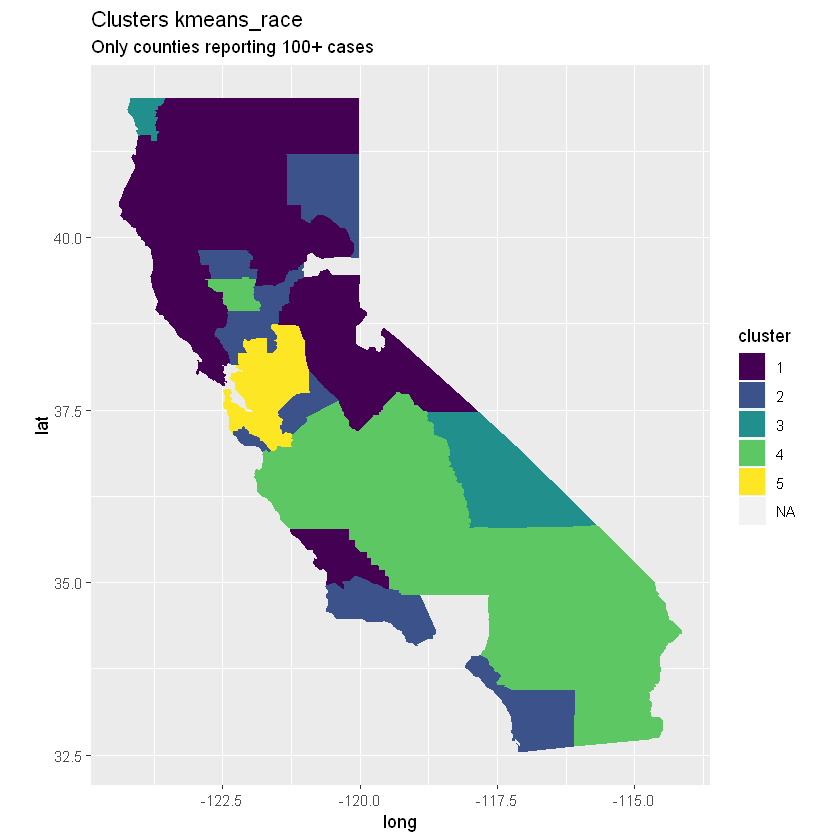

In [57]:
ggplot(counties_CA_clust_race, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = cluster)) +
  coord_quickmap() + 
  scale_fill_viridis_d() + 
  labs(title = "Clusters kmeans_race", subtitle = "Only counties reporting 100+ cases")

In [58]:
km_race

K-means clustering with 5 clusters of sizes 21, 12, 2, 12, 8

Cluster means:
  median_age white_per_1000 black_per_1000 asian_per_1000 hispanic_per_1000
1  0.9637065      1.0841726     -0.5977275     -0.5735966        -0.8506180
2 -0.5582103     -0.2181553     -0.1027391      0.1377239         0.2305123
3  0.4800069      0.4439970     -0.5397821     -0.6153019        -0.5684901
4 -1.0165223     -1.2062814      0.2334877     -0.3197414         1.5413401
5 -0.2876324     -0.8202974      1.5078573      1.9325428        -0.2827838
  amerindian_per_1000
1           0.2628242
2          -0.3306668
3           3.9873135
4          -0.4083589
5          -0.5782034

Clustering vector:
 [1] 4 4 2 2 5 4 5 4 5 2 5 5 2 4 4 5 5 5 4 2 1 4 4 1 1 4 2 1 2 1 1 1 2 2 4 2 2 1
[39] 1 1 1 1 1 1 2 1 4 1 1 3 3 1 1 1 1

Within cluster sum of squares by cluster:
[1] 30.02884 18.35614  2.43530 13.17369 23.83025
 (between_SS / total_SS =  72.9 %)

Available components:

[1] "cluster"      "centers"      "totss"   

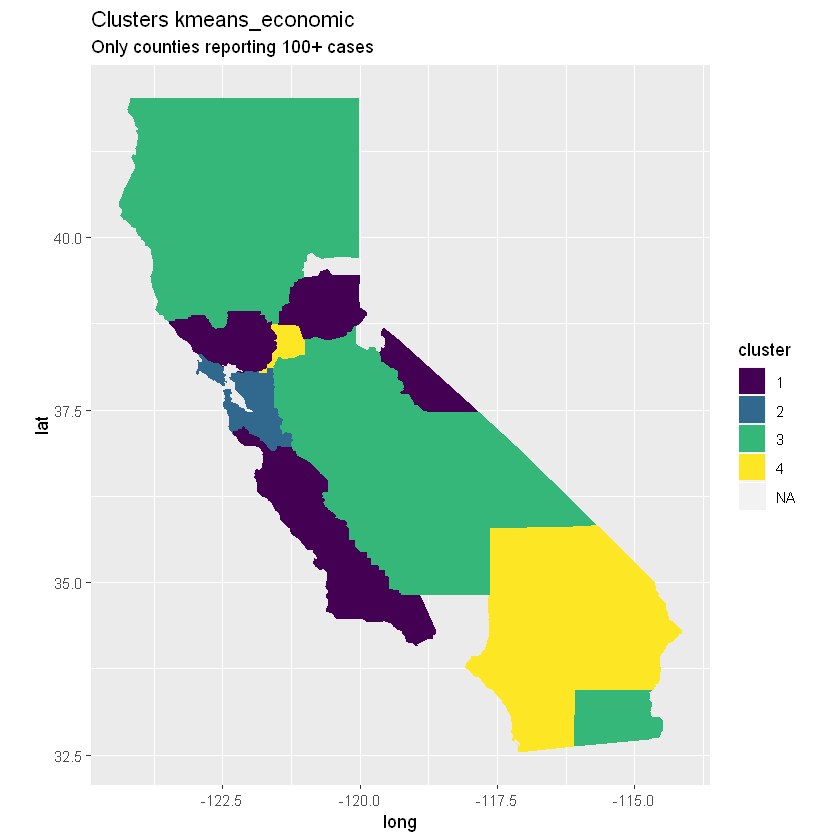

In [25]:
ggplot(counties_CA_clust_economic, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = cluster)) +
  coord_quickmap() + 
  scale_fill_viridis_d() + 
  labs(title = "Clusters kmeans_economic", subtitle = "Only counties reporting 100+ cases")

In [61]:
km_economic

K-means clustering with 4 clusters of sizes 14, 6, 30, 5

Cluster means:
  median_income income_per_capita median_rent    poverty
1     0.5585589        0.39330153   0.6137536 -0.3576054
2     2.0595064        2.15721589   1.8794068  0.2841103
3    -0.7177187       -0.60840589  -0.7554339 -0.3339846
4     0.2709399       -0.03946803   0.5588049  2.6642703
  commuters_by_public_transportation
1                         -0.2873322
2                          2.0959933
3                         -0.3647994
4                          0.4781349

Clustering vector:
 [1] 4 4 4 4 2 3 4 3 2 1 3 2 3 3 1 2 2 1 3 1 1 3 3 1 1 3 1 2 1 3 3 1 3 1 1 3 3 3
[39] 3 1 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3

Within cluster sum of squares by cluster:
[1]  8.425943 29.305937 18.837797  7.681288
 (between_SS / total_SS =  76.2 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

Joining, by = "county"


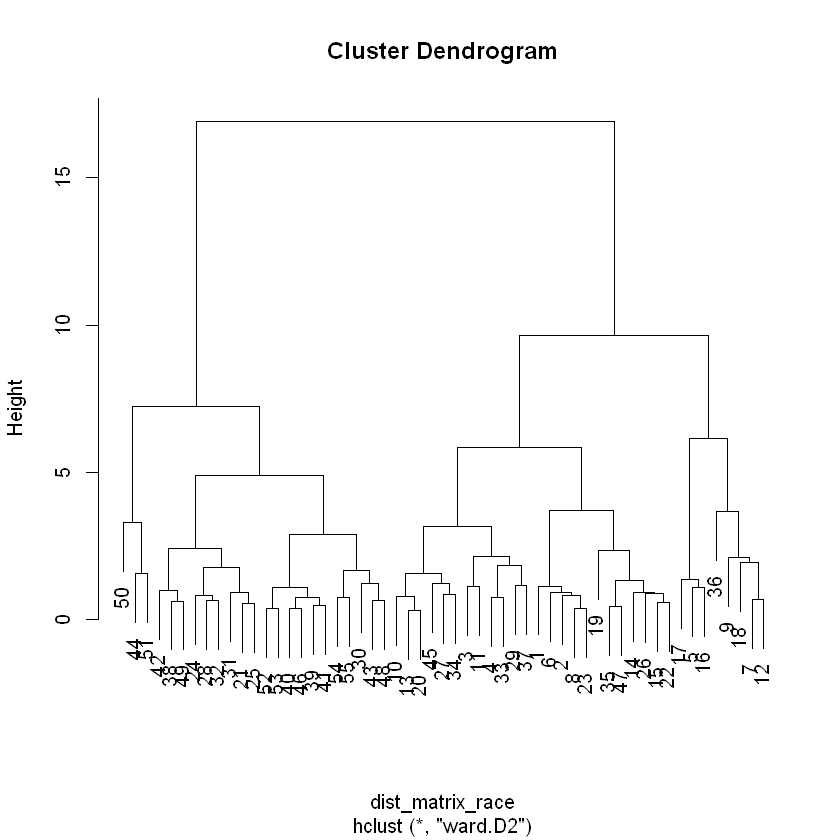

In [62]:
# Compute the distance matrix
dist_matrix_race <- dist(cases_CA_race_scaled)
# Perform hierarchical clustering
hc_race <- hclust(dist_matrix_race, method="ward.D2")
# Plot the dendrogram
#plot(hc)
# Get clusters
clusters_race <- cutree(hc_race, k = 5)
cluster_complete_race <- cases_CA_race_scaled %>%
  add_column(cluster = factor(clusters_race))
# Modify to graph
cases_CA_race_hc <- cases_CA_race %>% mutate(county = county_name %>% 
    str_to_lower() %>% str_replace('\\s+county\\s*$', ''))
counties_CA_clust_race_hc <- counties_CA %>% left_join(cases_CA_race %>% 
    add_column(cluster = factor(cluster_complete_race$cluster)))
plot(hc_race)

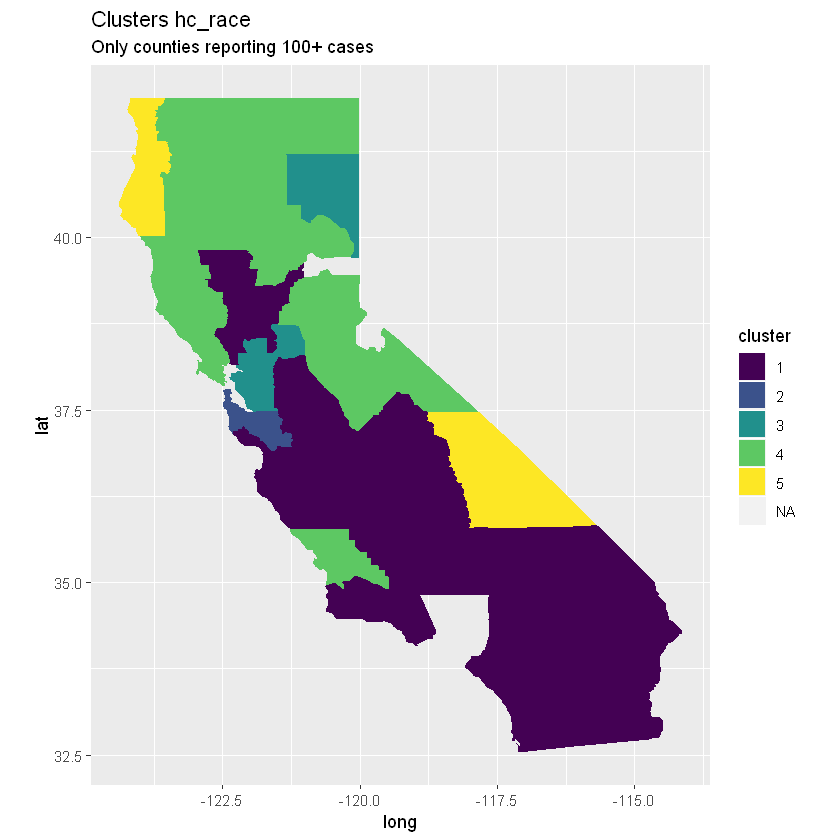

In [63]:
ggplot(counties_CA_clust_race_hc, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = cluster)) +
  coord_quickmap() + 
  scale_fill_viridis_d() + 
  labs(title = "Clusters hc_race", subtitle = "Only counties reporting 100+ cases")

In [66]:
aggregate(cases_CA_race_scaled, by = list(clusters_race), mean)

Group.1,median_age,white_per_1000,black_per_1000,asian_per_1000,hispanic_per_1000,amerindian_per_1000
1,-0.8027325,-0.7827651,0.03754548,-0.02405339,0.9379542,-0.4277643
2,-0.1373114,-0.8596847,0.10894023,3.00230246,-0.4702810,-0.6205102
3,-0.3040675,-0.4580406,2.48078608,0.96930131,-0.4200199,-0.2732124
4,1.0235677,1.0860701,-0.59499155,-0.57620554,-0.8387910,0.1912956
5,0.2421656,0.6447388,-0.57733718,-0.58400720,-0.7413793,3.2226748


Joining, by = "county"


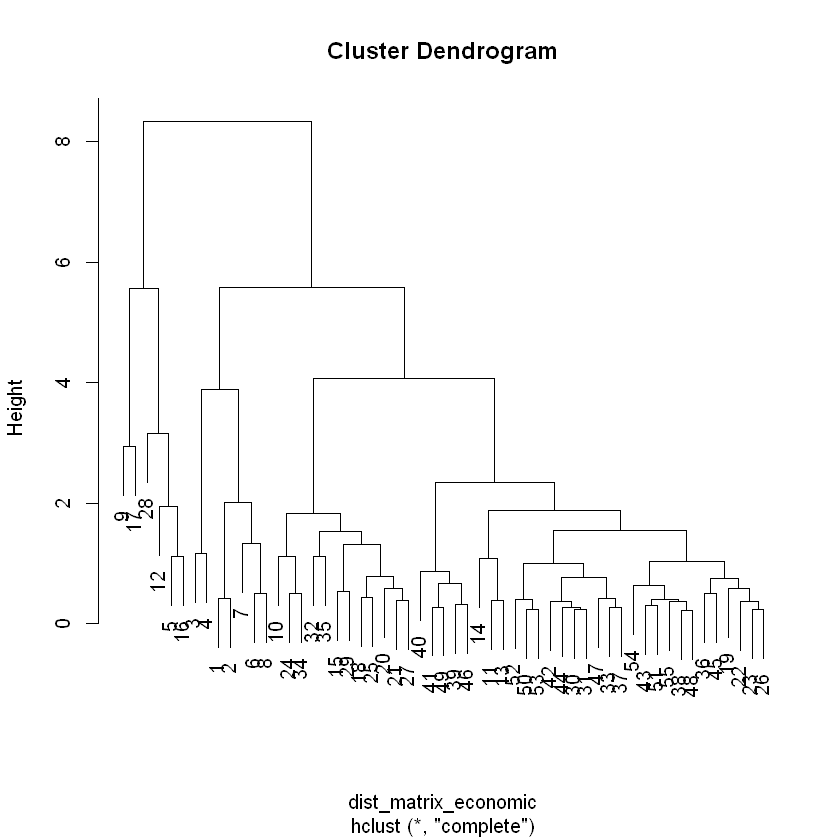

In [68]:
# Compute the distance matrix
dist_matrix_economic <- dist(cases_CA_economic_scaled)
# Perform hierarchical clustering
hc_economic <- hclust(dist_matrix_economic)
# Plot the dendrogram
#plot(hc)
# Get clusters
clusters_economic <- cutree(hc_economic, k = 4)
cluster_complete_economic <- cases_CA_economic_scaled %>%
  add_column(cluster = factor(clusters_economic))
# Modify to graph
cases_CA_economic_hc <- cases_CA_economic %>% mutate(county = county_name %>% 
    str_to_lower() %>% str_replace('\\s+county\\s*$', ''))
counties_CA_clust_economic_hc <- counties_CA %>% left_join(cases_CA_economic %>% 
    add_column(cluster = factor(cluster_complete_economic$cluster)))
plot(hc_economic)

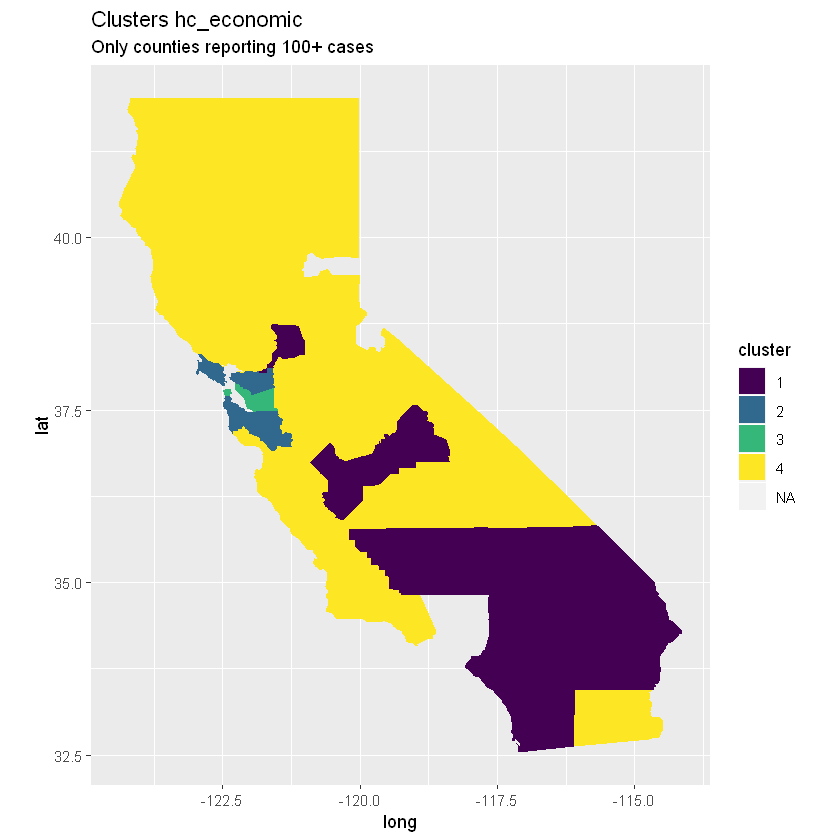

In [69]:
ggplot(counties_CA_clust_economic_hc, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = cluster)) +
  coord_quickmap() + 
  scale_fill_viridis_d() + 
  labs(title = "Clusters hc_economic", subtitle = "Only counties reporting 100+ cases")

In [70]:
aggregate(cases_CA_economic_scaled, by = list(clusters_economic), mean)

Group.1,median_income,income_per_capita,median_rent,poverty,commuters_by_public_transportation
1,0.008231289,-0.2688131,0.1998063,2.2865591,0.2675234
2,2.254324085,2.2410344,2.0738644,0.1165623,0.9104101
3,1.669870905,1.9895788,1.4904917,0.6192062,4.4671598
4,-0.295587076,-0.2633715,-0.3017877,-0.4216804,-0.3440148
